In [3]:
!pip install yfinance

In [97]:
import yfinance as yf
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

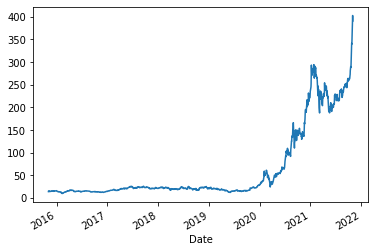

In [53]:
tsla=yf.download('TSLA','2015-11-3','2021-11-3')
tsla.Close.plot()

In [54]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,62.620500,63.957344,61.269078,62.713065,62.713065,1.224573e+08
std,81.879946,83.652975,80.209938,82.109952,82.109952,8.802065e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.200001,16.445333,15.928667,16.198000,16.198000,6.709350e+07
50%,21.275999,21.652666,20.934000,21.338667,21.338667,9.543600e+07
75%,54.372334,55.066666,52.451668,53.794001,53.794001,1.445872e+08
max,386.453339,403.250000,382.000000,402.863342,402.863342,9.140820e+08


In [55]:
tsla.Close.isnull().sum()

0

In [56]:
tslapct=tsla.Close.pct_change()
tslalog=np.log(tslapct)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Date'>

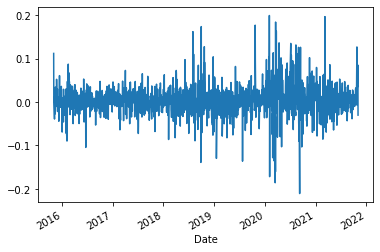

In [61]:
tslapct.plot()

<AxesSubplot:xlabel='Date'>

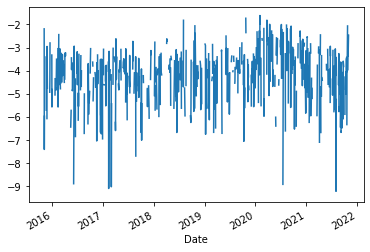

In [57]:
tslalog.plot()

In [59]:
tslapct.describe()

count    1510.000000
mean        0.002851
std         0.035839
min        -0.210628
25%        -0.014107
50%         0.001535
75%         0.019080
max         0.198949
Name: Close, dtype: float64

<AxesSubplot:ylabel='Density'>

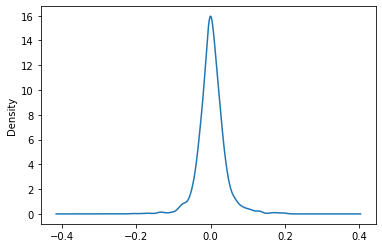

In [62]:
tslapct.plot(kind ='kde')

In [72]:
dickeyp=adfuller(tslapct.dropna().values.reshape(-1,1),regression="nc")[1]
dickeyp

0.0

In [74]:
tslapct.dropna()

Date
2015-11-04    0.111735
2015-11-05    0.000604
2015-11-06    0.002546
2015-11-09   -0.030255
2015-11-10   -0.039187
                ...   
2021-10-27    0.019078
2021-10-28    0.037751
2021-10-29    0.034316
2021-11-01    0.084910
2021-11-02   -0.030275
Name: Close, Length: 1510, dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
norm=sc.fit_transform(tslapct.dropna().values.reshape(-1,1))

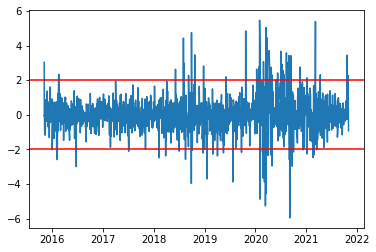

In [93]:
plt.plot(tslapct.index[0:1510],norm)
plt.axhline(y=2,c='r')
plt.axhline(y=-2,c='r')

In [85]:
adfuller(norm,regression='nc')[1]

0.0

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

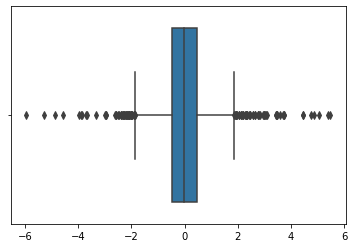

In [87]:
sns.boxplot(norm)

In [104]:
norm

array([[ 3.03912217],
       [-0.06270024],
       [-0.00851509],
       ...,
       [ 0.87824959],
       [ 2.29040128],
       [-0.92458906]])

In [114]:
normpd=pd.DataFrame(norm)
normpd.describe()

,0
count,1.510000e+03
mean,-3.543891e-17
std,1.000331e+00
min,-5.958516e+00
25%,-4.733296e-01
50%,-3.672713e-02
75%,4.529959e-01
max,5.473381e+00


In [112]:
normo=normpd[(normpd  > 2) & ( normpd < -2)]
normo

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,NaN
1506,NaN
1507,NaN
1508,NaN


In [115]:
from scikit_posthocs import outliers_gesd

In [117]:
outliers_gesd(normpd.values.reshape(-1,1),report=True)

'H0: no outliers in the data\nHa: up to 5 outliers in the data\nSignificance level:  α = 0.05\nReject H0 if Ri > Critical Value (λi)\n\nSummary Table for Two-Tailed Test\n---------------------------------------\n      Exact           Test     Critical\n  Number of      Statistic    Value, λi\nOutliers, i      Value, Ri          5 %\n---------------------------------------\n          1          5.957         4.14 *\n          2          5.531         4.14 *\n          3          5.518        4.139 *\n          4          5.428        4.139 *\n          5          5.262        4.139 *'

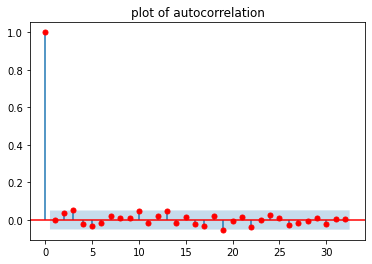

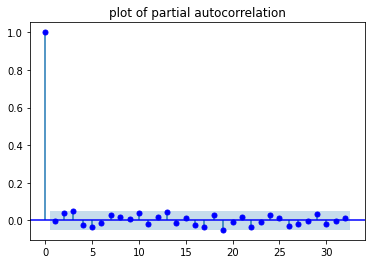

In [122]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(normpd,c='r',title='plot of autocorrelation')
plot_pacf(normpd,c='b',title='plot of partial autocorrelation')
print()

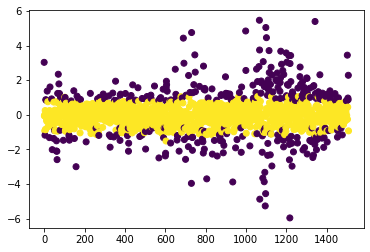

In [127]:
from sklearn.ensemble import IsolationForest
isoc=IsolationForest(random_state=0,n_estimators=5,max_samples ='auto',max_features=1).fit(normpd.values.reshape(-1,1))
resiso=isoc.predict(normpd.values.reshape(-1,1))
plt.scatter(normpd.index,normpd.values,c=resiso)

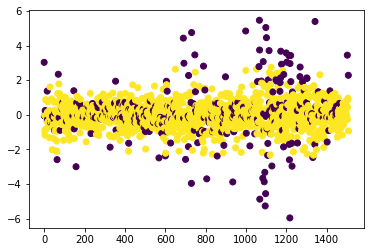

In [131]:
from sklearn.neighbors import LocalOutlierFactor
lofclf=LocalOutlierFactor(n_neighbors=20,contamination=0.2).fit_predict(normpd.values.reshape(-1,1))
plt.scatter(normpd.index,normpd.values,c=lofclf)

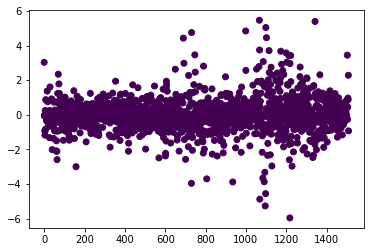

In [138]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
modeldb = DBSCAN(eps = 1000, algorithm='kd_tree', p=1,min_samples = 10).fit(normpd.values.reshape(-1,1))
colorsdb= modeldb.labels_
plt.scatter(normpd.index, normpd.values, c = colorsdb)

In [139]:

import numpy as np
import pandas as pd
# Follows algo from https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

def c(size):
    if size > 2:
        return 2 * (np.log(size-1)+0.5772156649) - 2*(size-1)/size
    if size == 2:
        return 1
    return 0


class LeafNode:
    def __init__(self, size, data):
        self.size = size
        self.data = data


class DecisionNode:
    def __init__(self, left, right, splitAtt, splitVal):
        self.left = left
        self.right = right
        self.splitAtt = splitAtt
        self.splitVal = splitVal


class IsolationTree:
    def __init__(self, height, height_limit):
        self.height = height
        self.height_limit = height_limit

    def fit(self, X: np.ndarray, improved=False):
        """
        Given a 2D matrix of observations, create an isolation tree. Set field
        self.root to the root of that tree and return it.
        If you are working on an improved algorithm, check parameter "improved"
        and switch to your new functionality else fall back on your original code.
        """
        if improved:
            self.improved_fit(X)
        else:
            if self.height >= self.height_limit or X.shape[0] <= 2:
                self.root = LeafNode(X.shape[0], X)
                return self.root

            # Choose Random Split Attributes and Value
            num_features = X.shape[1]
            splitAtt = np.random.randint(0, num_features)
            splitVal = np.random.uniform(min(X[:, splitAtt]), max(X[:, splitAtt]))

            X_left = X[X[:, splitAtt] < splitVal]
            X_right = X[X[:, splitAtt] >= splitVal]

            left = IsolationTree(self.height + 1, self.height_limit)
            right = IsolationTree(self.height + 1, self.height_limit)
            left.fit(X_left)
            right.fit(X_right)
            self.root = DecisionNode(left.root, right.root, splitAtt, splitVal)
            self.n_nodes = self.count_nodes(self.root)
            return self.root

    def improved_fit(self, X: np.ndarray):
        if self.height >= self.height_limit or X.shape[0] <= 2:
            self.root = LeafNode(X.shape[0], X)
            return self.root

        # Choose Best (The Most unbalanced) Random Split Attributes and Value
        num_features = X.shape[1]
        ratio_imp = 0.5 # Intialize the samples ratio after split as 0.5

        for i in range(num_features):
            splitAtt = i
            for _ in range(10):
                splitVal = np.random.uniform(min(X[:, splitAtt]), max(X[:, splitAtt]))
                X_left = X[X[:, splitAtt] < splitVal]
                X_right = X[X[:, splitAtt] >= splitVal]
                ratio = min(X_left.shape[0] / (X_left.shape[0] + X_right.shape[0]),
                            X_right.shape[0] / (X_left.shape[0] + X_right.shape[0]))
                if ratio < ratio_imp:
                    splitAtt_imp = splitAtt
                    splitVal_imp = splitVal
                    X_left_imp = X_left
                    X_right_imp = X_right
                    ratio_imp = ratio

        left = IsolationTree(self.height + 1, self.height_limit)
        right = IsolationTree(self.height + 1, self.height_limit)
        left.fit(X_left_imp)
        right.fit(X_right_imp)
        self.root = DecisionNode(left.root, right.root, splitAtt_imp, splitVal_imp)
        self.n_nodes = self.count_nodes(self.root)
        return self.root

    def count_nodes(self, root):
        count = 0
        stack = [root]
        while stack:
            node = stack.pop()
            count += 1
            if isinstance(node, DecisionNode):
                stack.append(node.right)
                stack.append(node.left)
        return count


class IsolationTreeEnsemble:
    def __init__(self, sample_size, n_trees=10):
        self.sample_size = sample_size
        self.n_trees = n_trees

    def fit(self, X: np.ndarray, improved=False):
        """
        Given a 2D matrix of observations, create an ensemble of IsolationTree
        objects and store them in a list: self.trees.  Convert DataFrames to
        ndarray objects.
        """
        self.trees = []
        if isinstance(X, pd.DataFrame):
            X = X.values
        n_rows = X.shape[0]
        height_limit = np.ceil(np.log2(self.sample_size))
        for i in range(self.n_trees):
            # data_index = np.random.choice(range(n_rows), size=self.sample_size, replace=False)
            data_index = np.random.randint(0, n_rows, self.sample_size)
            X_sub = X[data_index]
            tree = IsolationTree(0, height_limit)
            tree.fit(X_sub)
            self.trees.append(tree)
        return self

    def path_length(self, X:np.ndarray) -> np.ndarray:
        """
        Given a 2D matrix of observations, X, compute the average path length
        for each observation in X.  Compute the path length for x_i using every
        tree in self.trees then compute the average for each x_i.  Return an
        ndarray of shape (len(X),1).
        """
        paths = []
        for row in X:
            path = []
            for tree in self.trees:
                node = tree.root
                length = 0
                while isinstance(node, DecisionNode):
                    if row[node.splitAtt] < node.splitVal:
                        node = node.left
                    else:
                        node = node.right
                    length += 1
                leaf_size = node.size
                pathLength = length + c(leaf_size)
                path.append(pathLength)
            paths.append(path)
        paths = np.array(paths)
        return np.mean(paths, axis=1)

    def anomaly_score(self, X:pd.DataFrame) -> np.ndarray:
        """
        Given a 2D matrix of observations, X, compute the anomaly score
        for each x_i observation, returning an ndarray of them.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        avg_length = self.path_length(X)
        scores = np.array([np.power(2, -l/c(self.sample_size))for l in avg_length])
        return scores

    def predict_from_anomaly_scores(self, scores:np.ndarray, threshold:float) -> np.ndarray:
        """
        Given an array of scores and a score threshold, return an array of
        the predictions: 1 for any score >= the threshold and 0 otherwise.
        """
        return np.array([1 if s >= threshold else 0 for s in scores])

    def predict(self, X:np.ndarray, threshold:float) -> np.ndarray:
        "A shorthand for calling anomaly_score() and predict_from_anomaly_scores()."
        scores = self.anomaly_score(X)
        prediction = self.predict_from_anomaly_scores(scores, threshold)
        return prediction


def find_TPR_threshold(y, scores, desired_TPR):
    """
    Start at score threshold 1.0 and work down until we hit desired TPR.
    Step by 0.01 score increments. For each threshold, compute the TPR
    and FPR to see if we've reached to the desired TPR. If so, return the
    score threshold and FPR.
    """
    TPR = 0
    FPR = 0
    threshold = 1
    while TPR < desired_TPR:
        threshold -= 0.01
        prediction = [1 if s > threshold else 0 for s in scores]
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for p, label in zip(prediction, y):
            if p == 1 and label == 1:
                TP += 1
            if p == 0 and label == 0:
                TN += 1
            if p == 1 and label == 0:
                FP += 1
            if p == 0 and label == 1:
                FN += 1
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if threshold < 0:
            print("The model cannot reach the desired TPR")
            return

    return threshold, FPR

In [143]:
iso=IsolationTreeEnsemble(1510).fit(normpd.values.reshape(-1,1))

In [151]:
scoreiso=iso.predict(normpd.values.reshape(-1,1),400)

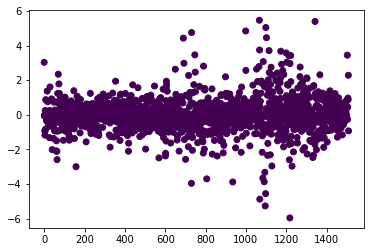

In [152]:
plt.scatter(normpd.index,normpd.values,c=scoreiso)

In [153]:
returnsant=pd.read_csv('returnsant.csv')

In [154]:
valuevsgrowth=returnsant['Factor - Value vs Growth']
rates=returnsant['Factor - Interest Rates']

<AxesSubplot:ylabel='Density'>

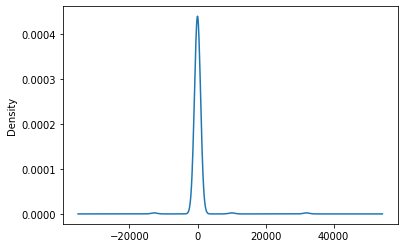

In [157]:
valuevsgrowth.plot(kind='kde')


<AxesSubplot:ylabel='Density'>

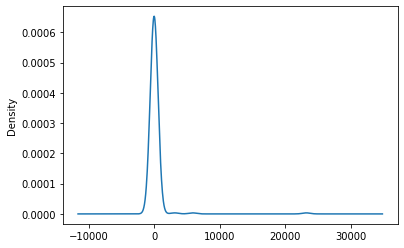

In [158]:
rates.plot(kind='kde')